<h1>CO2 Emission : Análise de exploração de dados<h1>

O presente conjunto de dados está disponível no Kaggle e contém dados de carros e sua emissão de CO2. O conjunto de dados contém 13 colunas e 1067 linhas com algumas caracteristicas como ano de fabricacao, modelo, fabricante e etc.

<h1>Exploração de dados</h1>

Inicialmente uma verificação dos dados é feita. O objetivo é compreender o comportamento dos dados, analisar os que estão faltantes e também propor análises gráficas a fim de averiguar as variáveis que possuem maior influência. Para que assim, possa se aplicar um modelo de ML e determinar a emissão de CO2 conforme os modelos propostos.

In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [16]:
co2_consumption = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
co2_consumption.shape

(1067, 13)

In [4]:
co2_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
co2_consumption.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
co2_consumption.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


Nota que a média de emissão de gás carbônico é de 256.22 unidades de massa.


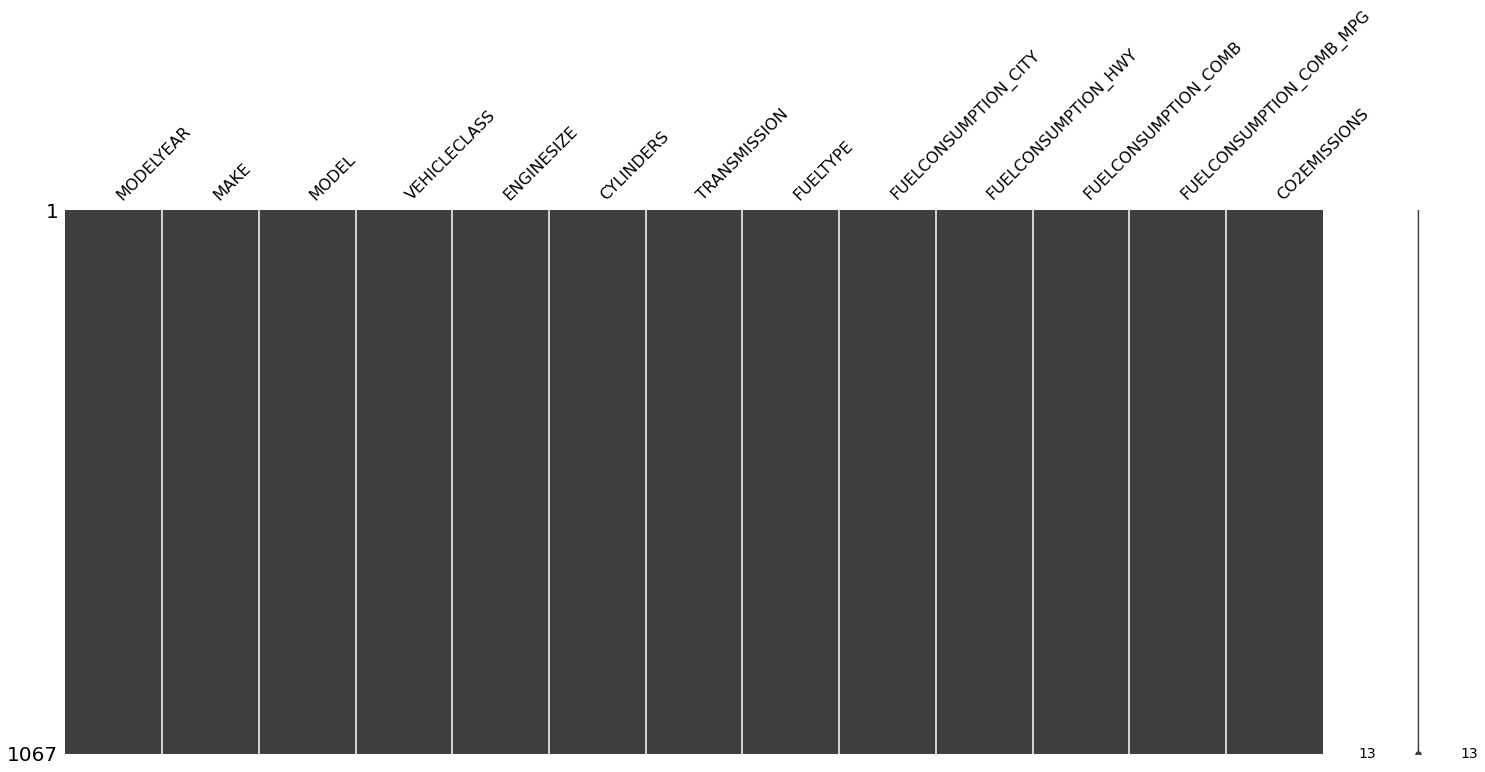

In [7]:
missingno.matrix(co2_consumption)

Como não há dados que estão faltando não é necessário fazer o preenchimento dos mesmos.
 


<h1>Correlação e visualização de dados</h1>

In [8]:
corr = co2_consumption.corr()
corr

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


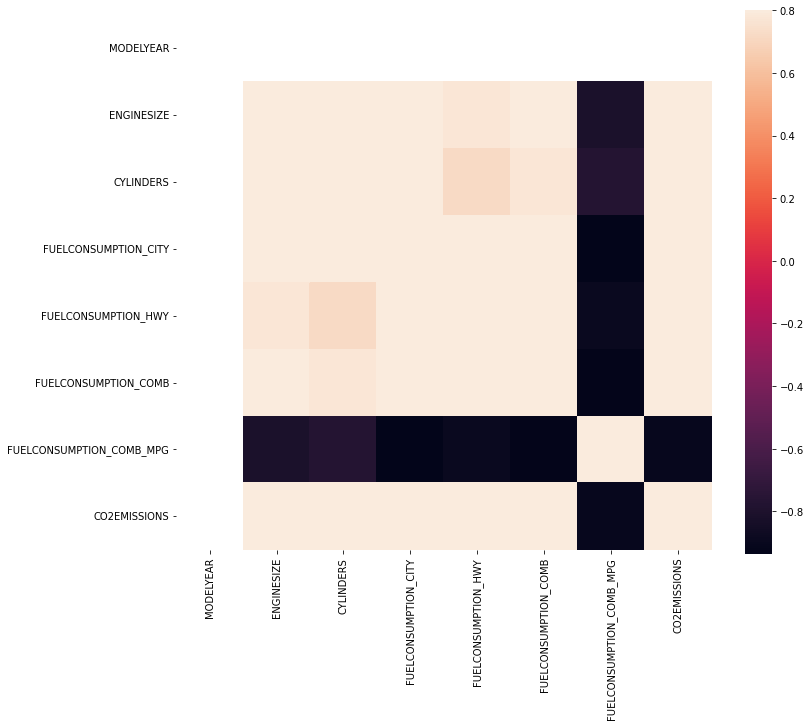

In [9]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True)

Como esperado nota-se uma correlação forte em quase todas as variáveis. Como proposto na física básica o consumo de energético definido por uma relação quadrática, que quanto maior energia necessária maior é o consumo, resultando portanto em mais emissões de gases. No caso, o consumo de combustível apresenta relação mais forte com todas as demais variáveis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


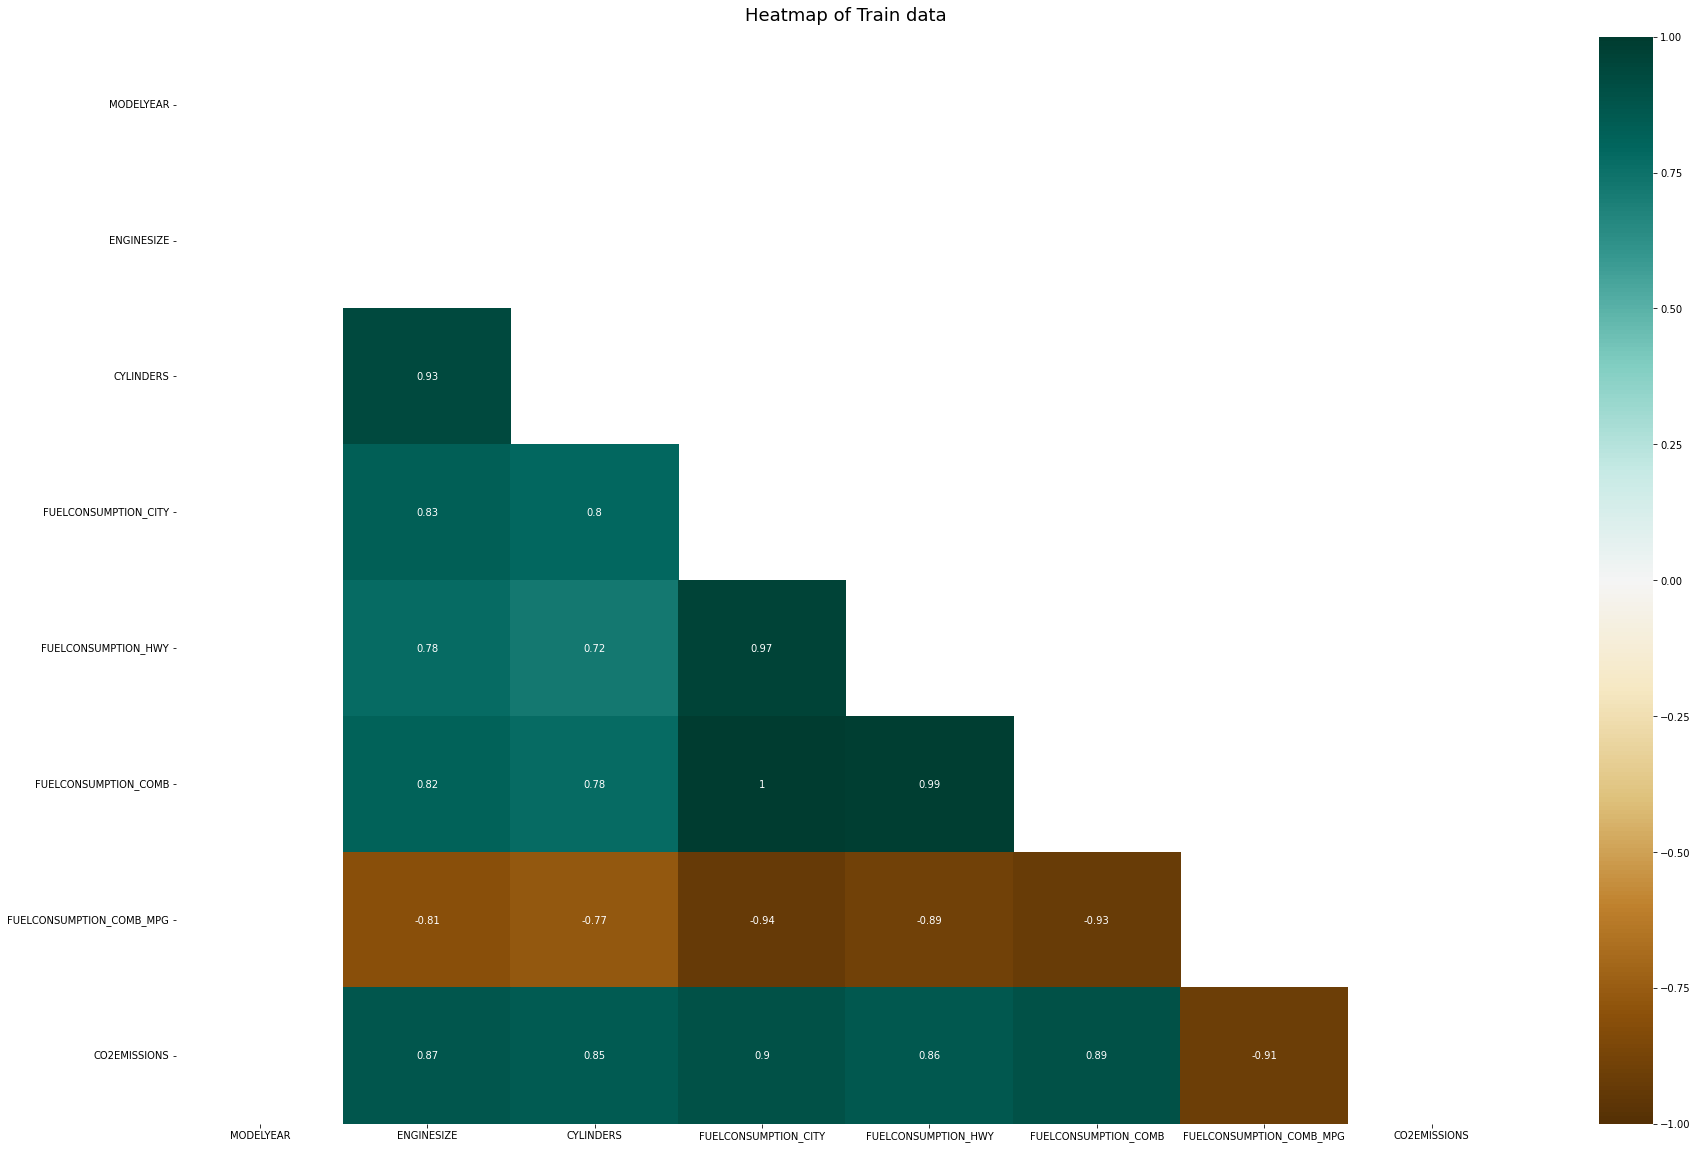

In [10]:
plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(co2_consumption.corr(), dtype=np.bool))
heatmap = sns.heatmap(co2_consumption.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Train data', fontdict={'fontsize':18}, pad=16);

In [20]:
co2_consumption.groupby('VEHICLECLASS').count()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
VEHICLECLASS,,,,,,,,,,,,
COMPACT,172,172,172,172,172,172,172,172,172,172,172,172
FULL-SIZE,86,86,86,86,86,86,86,86,86,86,86,86
MID-SIZE,178,178,178,178,178,178,178,178,178,178,178,178
MINICOMPACT,47,47,47,47,47,47,47,47,47,47,47,47
MINIVAN,14,14,14,14,14,14,14,14,14,14,14,14
PICKUP TRUCK - SMALL,12,12,12,12,12,12,12,12,12,12,12,12
PICKUP TRUCK - STANDARD,62,62,62,62,62,62,62,62,62,62,62,62
SPECIAL PURPOSE VEHICLE,7,7,7,7,7,7,7,7,7,7,7,7
STATION WAGON - MID-SIZE,6,6,6,6,6,6,6,6,6,6,6,6


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


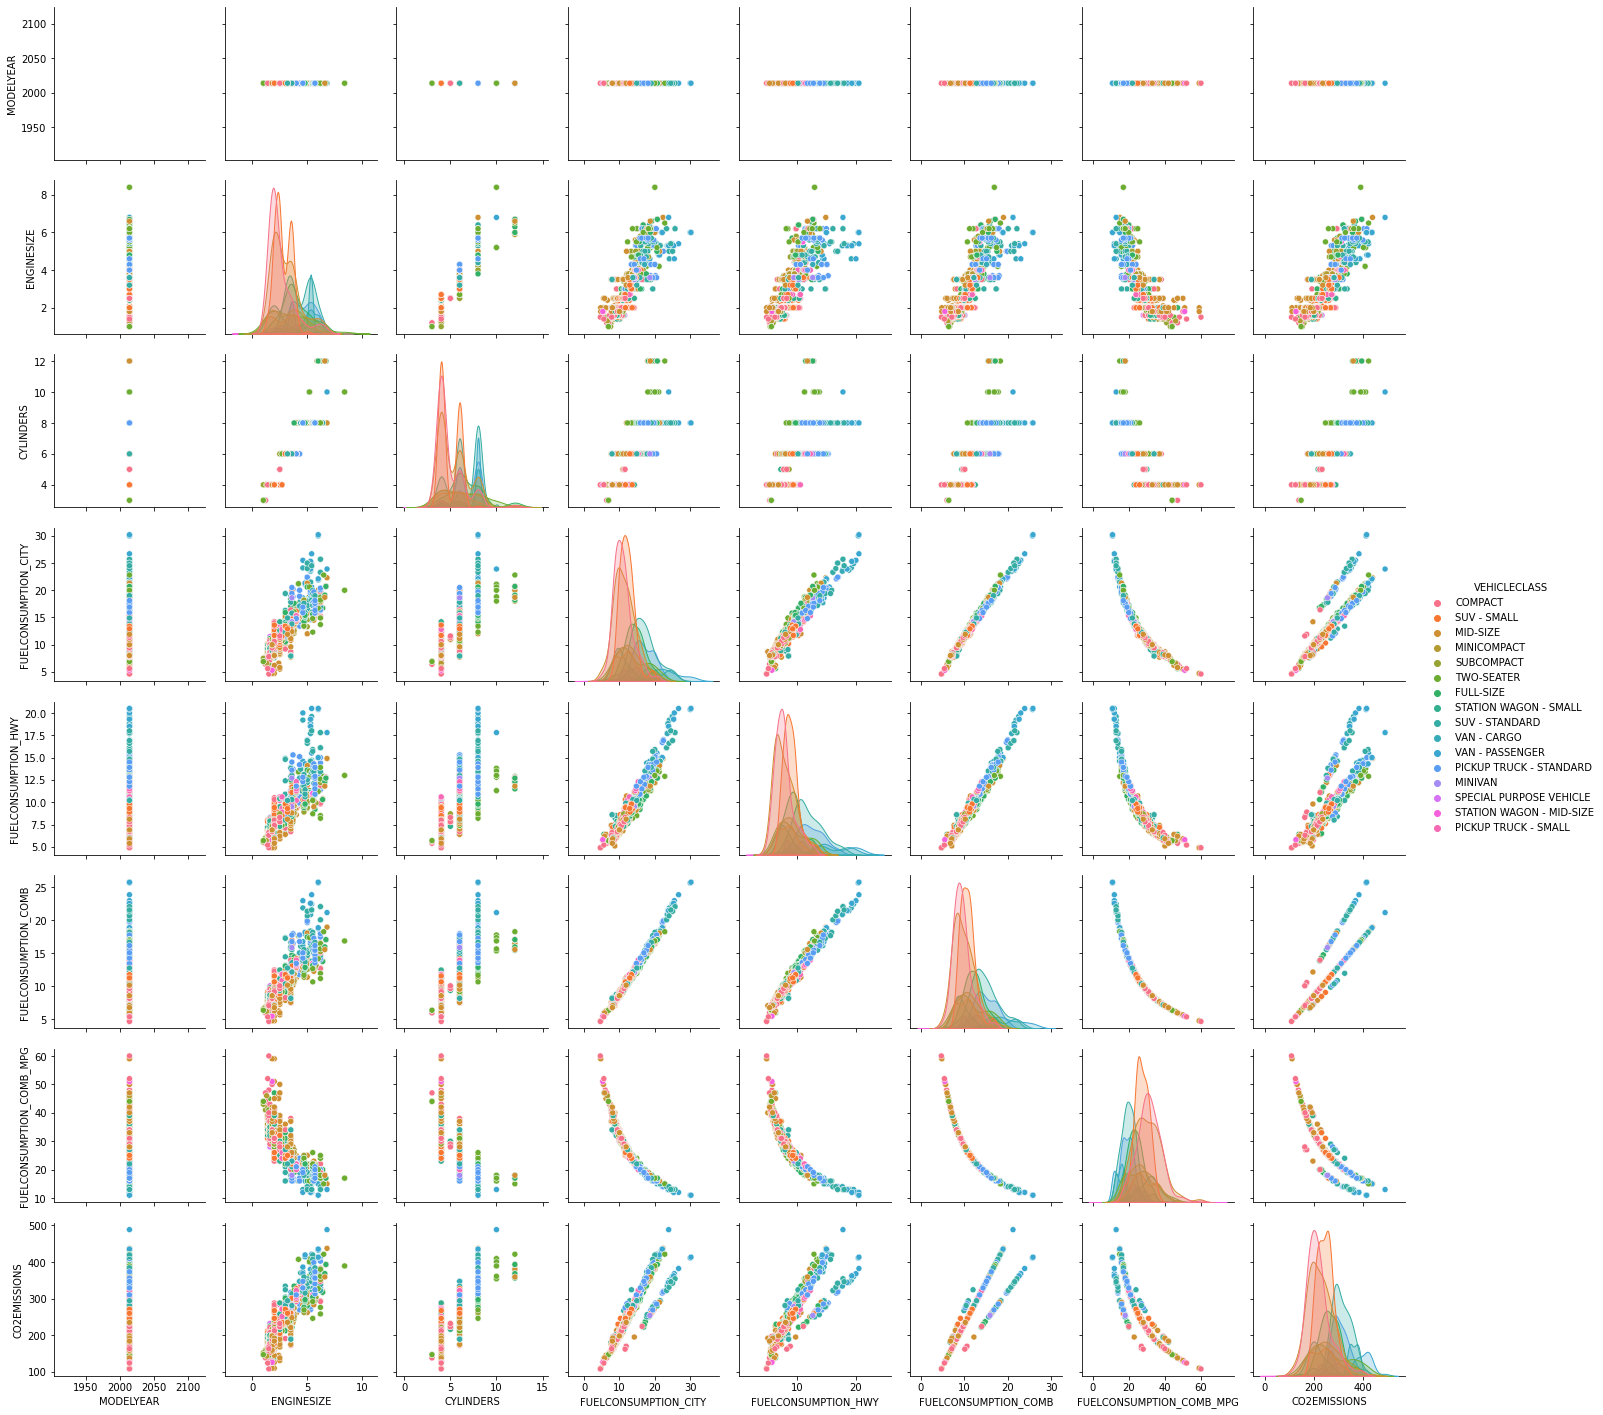

In [21]:
sns.pairplot(co2_consumption, size = 2.5, hue='VEHICLECLASS')
plt.show()

Detalhando as correlações de maior significância

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


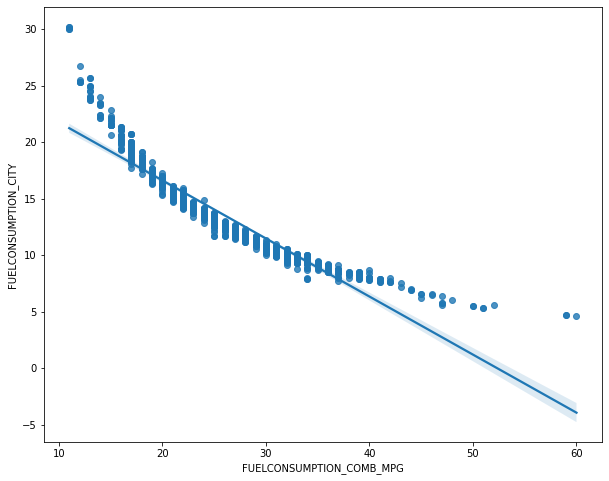

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(co2_consumption['FUELCONSUMPTION_COMB_MPG'],co2_consumption['FUELCONSUMPTION_CITY'])

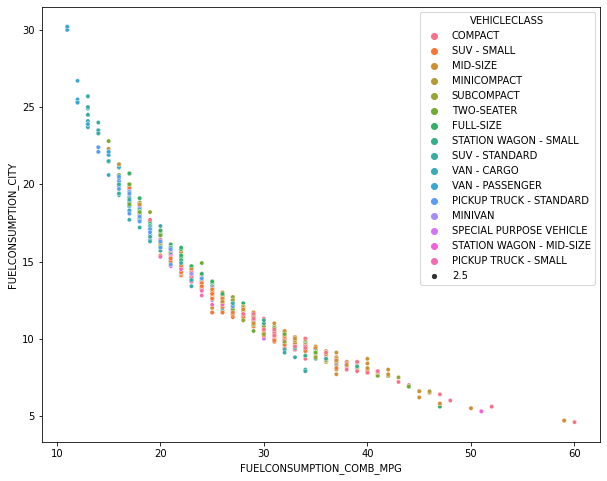

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=co2_consumption, x="FUELCONSUMPTION_COMB_MPG", y="FUELCONSUMPTION_CITY", hue="VEHICLECLASS", size = 2.5)

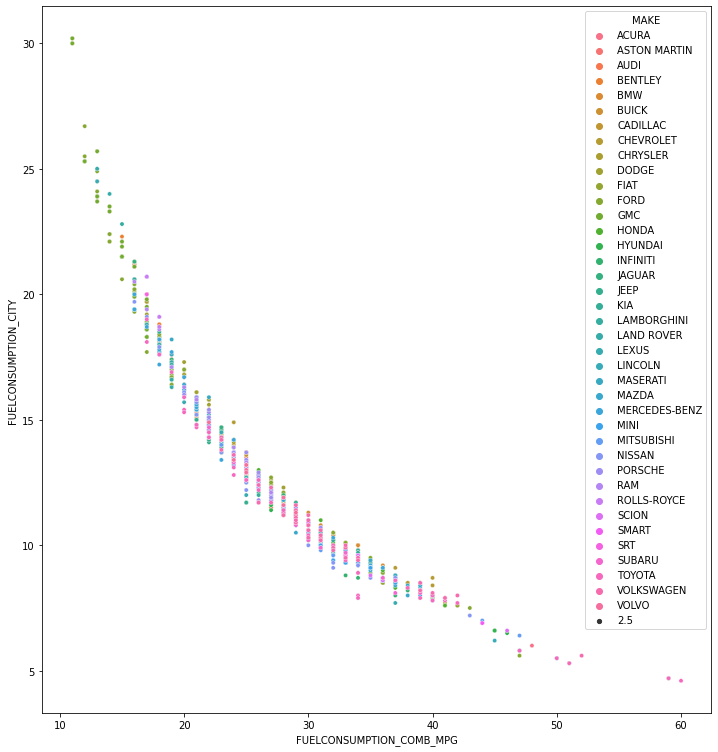

In [42]:
fig, ax = plt.subplots(figsize=(12,13))
sns.scatterplot(data=co2_consumption, x="FUELCONSUMPTION_COMB_MPG", y="FUELCONSUMPTION_CITY", hue="MAKE", size = 2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


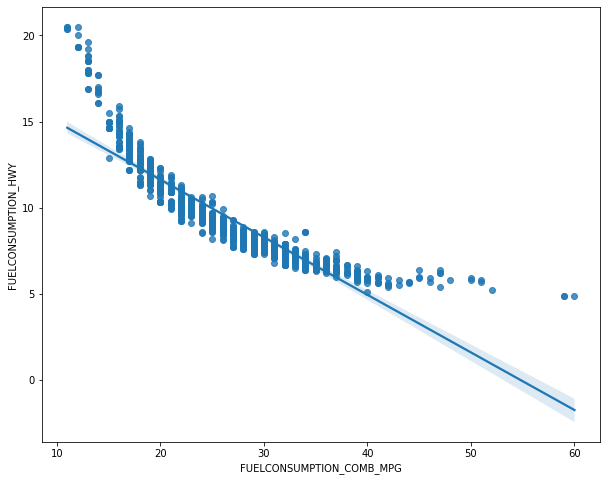

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(co2_consumption['FUELCONSUMPTION_COMB_MPG'],co2_consumption['FUELCONSUMPTION_HWY'])

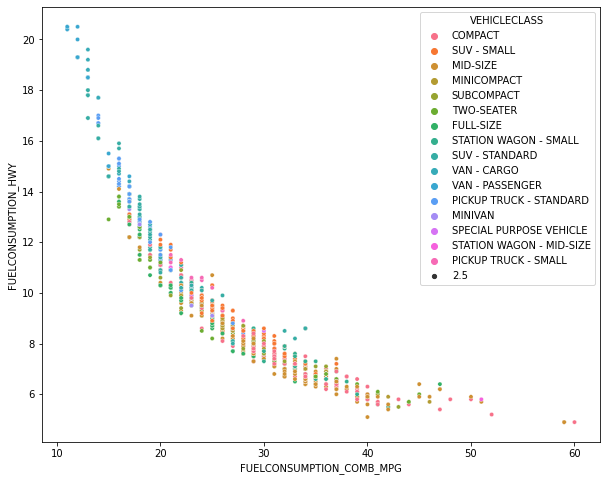

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=co2_consumption, x="FUELCONSUMPTION_COMB_MPG", y="FUELCONSUMPTION_HWY", hue="VEHICLECLASS", size = 2.5)

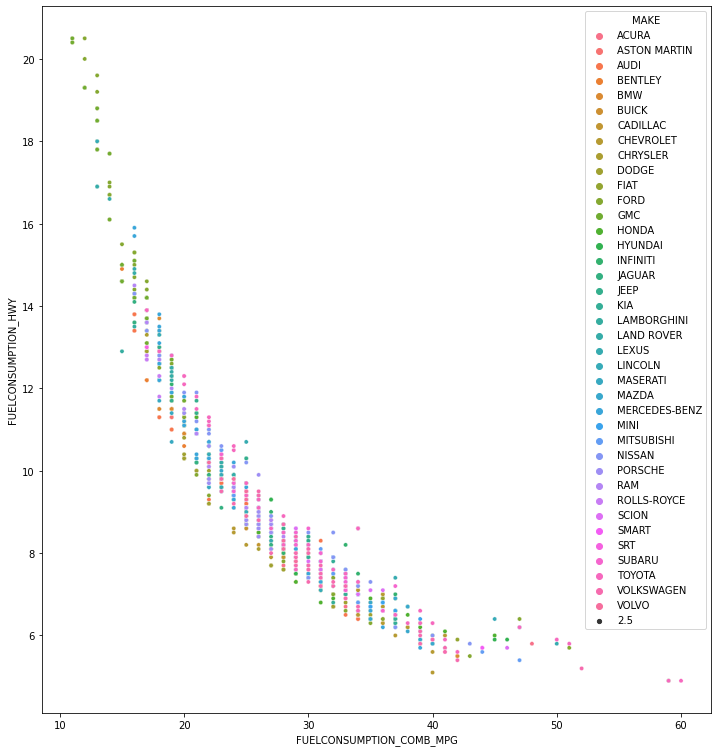

In [44]:
fig, ax = plt.subplots(figsize=(12,13))
sns.scatterplot(data=co2_consumption, x="FUELCONSUMPTION_COMB_MPG", y="FUELCONSUMPTION_HWY", hue="MAKE", size = 2.5)

Nota-se que o maior consumo de combustível afeta diretamente a emissão de gases poluentes como já esperado. Entre esses valores, pode se destacar os que mais consomem combustível por milha rodada como as vans e suvs e entre a marca de maior consumo a GMV.
